## Analyzing the Impact of Health on Academic Performance
To analyze the impact of students' health status on their academic performance, we can segment the students by their health status (Good, Average, Poor) and calculate the average scores, attendance, and disciplinary incidents for each group. This can help us identify if health status has a significant influence on student outcomes.

Steps to Implement the Analysis:

1. Calculate average academic performance metrics (total scores, attendance) grouped by health status.
2. Visualize the distribution of scores and attendance for students in different health categories.
3. Perform statistical tests (e.g., ANOVA) to determine if the differences in academic performance between health categories are statistically significant.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
students_df = pd.read_csv("../DataGeneration/students_bio_data.csv")
academic_df = pd.read_csv("../DataGeneration/academic_history_data.csv")
parents_df = pd.read_csv("../DataGeneration/parents_bio_data.csv")


In [2]:

# Merge the health status from the student data with the academic performance data
merged_df = pd.merge(academic_df, students_df[['Student ID', 'Health Status']], on='Student ID')

# Calculate average scores and attendance by health status
health_performance = merged_df.groupby('Health Status').agg(
    Average_Score=('Total Score', 'mean'),
    Average_Attendance=('Attendance', 'mean'),
    Average_Disciplinary_Incidents=('Attendance', 'count')
).reset_index()

# Display the results
print("Impact of Health Status on Academic Performance")
print(health_performance)




Impact of Health Status on Academic Performance
  Health Status  Average_Score  Average_Attendance  \
0       Average      72.518963           84.968990   
1          Good      72.536572           84.936274   
2          Poor      72.507726           85.096250   

   Average_Disciplinary_Incidents  
0                           30216  
1                           26865  
2                           27117  


C:\Users\JOHNKENNEDY\AppData\Local\Temp\ipykernel_34520\3678285261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health Status', y='Average_Score', data=health_performance, palette='viridis')
C:\Users\JOHNKENNEDY\AppData\Local\Temp\ipykernel_34520\3678285261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health Status', y='Average_Attendance', data=health_performance, palette='viridis')


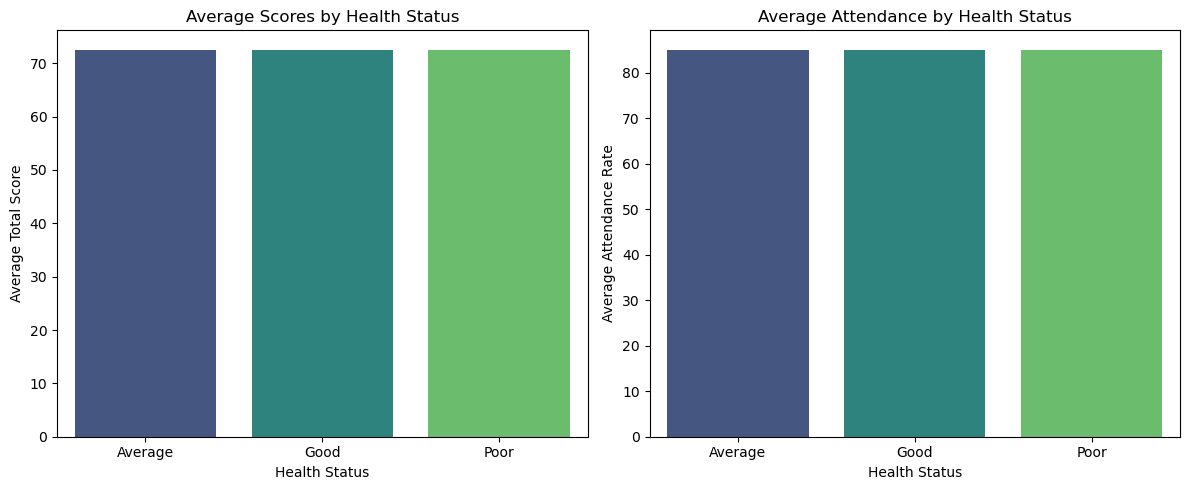

In [3]:

# Visualize the relationship between health status and academic performance
plt.figure(figsize=(12, 5))

# Plot average scores by health status
plt.subplot(1, 2, 1)
sns.barplot(x='Health Status', y='Average_Score', data=health_performance, palette='viridis')
plt.title('Average Scores by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Total Score')

# Plot average attendance by health status
plt.subplot(1, 2, 2)
sns.barplot(x='Health Status', y='Average_Attendance', data=health_performance, palette='viridis')
plt.title('Average Attendance by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Attendance Rate')

plt.tight_layout()
plt.show()


In [4]:
# Perform statistical test to see if the difference is significant
anova_result = stats.f_oneway(
    merged_df[merged_df['Health Status'] == 'Good']['Total Score'],
    merged_df[merged_df['Health Status'] == 'Average']['Total Score'],
    merged_df[merged_df['Health Status'] == 'Poor']['Total Score']
)
print(f"ANOVA Test for Health Status on Total Score: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

ANOVA Test for Health Status on Total Score: F-statistic = 0.04, p-value = 0.9594


## Comparing Health Status and Discipline Correlation
To compare health status with disciplinary records, we need to analyze the relationship between a student’s health and the number of disciplinary incidents. This can help us understand whether poor health is associated with higher instances of disciplinary issues.

## Step-by-Step Analysis:
1. Merge the health status and disciplinary records.
2. Calculate the average number of disciplinary incidents for each health status category.
3. Visualize the differences using bar plots.
4. Use a correlation matrix to identify if a strong relationship exists between health status and disciplinary incidents.

In [5]:
# Add mock data for disciplinary records to students for illustration purposes
import numpy as np

# Add a new column for disciplinary incidents
students_df['Disciplinary Incidents'] = np.random.randint(0, 10, size=len(students_df))

# Merge health status with disciplinary incidents
health_discipline_df = students_df[['Student ID', 'Health Status', 'Disciplinary Incidents']]

In [6]:
# Calculate average disciplinary incidents by health status
health_discipline_summary = health_discipline_df.groupby('Health Status').agg(
    Average_Disciplinary_Incidents=('Disciplinary Incidents', 'mean')
).reset_index()

# Display the results
print("Average Disciplinary Incidents by Health Status")
print(health_discipline_summary)

Average Disciplinary Incidents by Health Status
  Health Status  Average_Disciplinary_Incidents
0       Average                        4.613208
1          Good                        4.623656
2          Poor                        4.430693


C:\Users\JOHNKENNEDY\AppData\Local\Temp\ipykernel_34520\1201040113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health Status', y='Average_Disciplinary_Incidents', data=health_discipline_summary, palette='viridis')


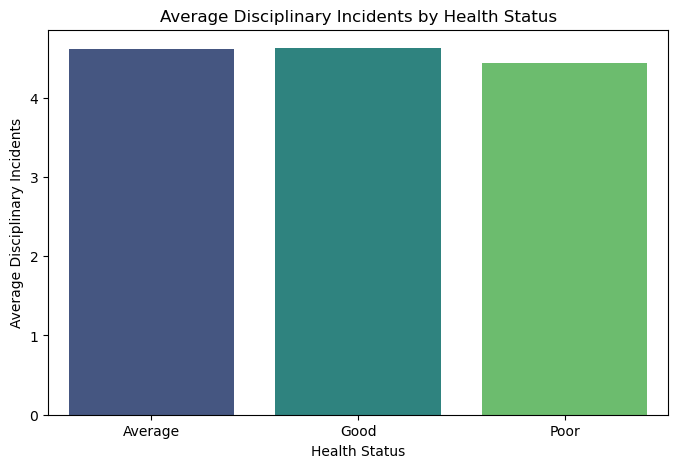

In [7]:
# Visualize the relationship between health status and disciplinary incidents
plt.figure(figsize=(8, 5))
sns.barplot(x='Health Status', y='Average_Disciplinary_Incidents', data=health_discipline_summary, palette='viridis')
plt.title('Average Disciplinary Incidents by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Disciplinary Incidents')
plt.show()

In [8]:


# Calculate the correlation between health status and disciplinary incidents
health_discipline_df['Health Status Numeric'] = health_discipline_df['Health Status'].map({'Good': 1, 'Average': 2, 'Poor': 3})
correlation_result = health_discipline_df[['Health Status Numeric', 'Disciplinary Incidents']].corr()
print("Correlation Matrix for Health Status and Disciplinary Incidents")
print(correlation_result)


Correlation Matrix for Health Status and Disciplinary Incidents
                        Health Status Numeric  Disciplinary Incidents
Health Status Numeric                 1.00000                -0.02714
Disciplinary Incidents               -0.02714                 1.00000


C:\Users\JOHNKENNEDY\AppData\Local\Temp\ipykernel_34520\2803557584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_discipline_df['Health Status Numeric'] = health_discipline_df['Health Status'].map({'Good': 1, 'Average': 2, 'Poor': 3})


## Multivariate Analysis: Combining Health, Parental Engagement, and Other Factors

We’ll now extend our analysis by combining multiple variables (health status, parental engagement, and attendance) to see their joint effect on student performance. This multivariate analysis will help us understand how these factors together influence academic outcomes.


## Create Multivariate Features and Analyze
1. Merge the Health Status, Parental Engagement, and Attendance data with the academic scores.
2. Create a Combined Engagement Score feature based on health, parental engagement, and attendance.
3. Use a heatmap to visualize the correlation matrix and identify relationships between variables.
4. Perform a multivariate analysis using multiple linear regression.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
students_df = pd.read_csv("../DataGeneration/students_bio_data.csv")
academic_df = pd.read_csv("../DataGeneration/academic_history_data.csv")
parents_df = pd.read_csv("../DataGeneration/parents_bio_data.csv")

# Merge the health status from the student data with the academic performance data
merged_health_df = pd.merge(academic_df, students_df[['Student ID', 'Health Status']], on='Student ID')
merged_health_df.head()

,Student ID,Grade Level,Subject,Term,Teacher ID,Test Score,Exam Score,Total Score,Attendance,Cumulative Score,Average Attendance,JAMB Score,Passed Core Subjects,Cumulative Attendance Rate,Health Status
0,STU001,JSS1,English Studies,First Term,TCH018,28,31,59,70,64.00,72.33,NaN,NaN,83.403509,Poor
1,STU001,JSS1,English Studies,Second Term,TCH018,17,36,53,77,64.00,72.33,NaN,NaN,83.403509,Poor
2,STU001,JSS1,English Studies,Third Term,TCH018,31,49,80,70,64.00,72.33,NaN,NaN,83.403509,Poor
3,STU001,JSS1,Literature in English,First Term,TCH015,32,36,68,92,73.33,87.67,NaN,NaN,83.403509,Poor
4,STU001,JSS1,Literature in English,Second Term,TCH015,35,52,87,87,73.33,87.67,NaN,NaN,83.403509,Poor


In [23]:
# Merge health status, parental engagement, and attendance data with academic scores
# merged_df = pd.merge(merged_health_df, students_df[['Student ID']], on='Student ID')
merged_df = pd.merge(merged_df, parents_df[['Parent ID', 'Student ID','Engagement in School Activities']], on='Student ID')
merged_df.head()

,Student ID,Grade Level,Subject,Term,Teacher ID,Test Score,Exam Score,Total Score,Attendance,Cumulative Score,...,Passed Core Subjects,Cumulative Attendance Rate,Health Status,Parent ID_x,Engagement in School Activities_x,Parent ID_y,Engagement in School Activities_y,Health Status Numeric,Parent ID,Engagement in School Activities
0,STU001,JSS1,English Studies,First Term,TCH018,28,31,59,70,64.00,...,NaN,83.403509,Poor,PAR071,Medium,PAR071,Medium,3,PAR071,Medium
1,STU001,JSS1,English Studies,Second Term,TCH018,17,36,53,77,64.00,...,NaN,83.403509,Poor,PAR071,Medium,PAR071,Medium,3,PAR071,Medium
2,STU001,JSS1,English Studies,Third Term,TCH018,31,49,80,70,64.00,...,NaN,83.403509,Poor,PAR071,Medium,PAR071,Medium,3,PAR071,Medium
3,STU001,JSS1,Literature in English,First Term,TCH015,32,36,68,92,73.33,...,NaN,83.403509,Poor,PAR071,Medium,PAR071,Medium,3,PAR071,Medium
4,STU001,JSS1,Literature in English,Second Term,TCH015,35,52,87,87,73.33,...,NaN,83.403509,Poor,PAR071,Medium,PAR071,Medium,3,PAR071,Medium


In [24]:
# Encode categorical variables into numeric for correlation analysis
merged_df['Health Status Numeric'] = merged_df['Health Status'].map({'Good': 1, 'Average': 2, 'Poor': 3})
merged_df['Parental Engagement Score'] = merged_df['Engagement in School Activities'].map({'High': 3, 'Medium': 2, 'Low': 1})
merged_df['Overall Performance Score'] = merged_df['Total Score']

In [25]:

# Create a new combined feature `Combined Engagement Score`
merged_df['Combined Engagement Score'] = (merged_df['Health Status Numeric'] + merged_df['Parental Engagement Score'] + merged_df['Attendance']) / 3

# Calculate correlations between different features and the overall performance score
correlation_matrix = merged_df[['Overall Performance Score', 'Health Status Numeric', 'Parental Engagement Score', 'Attendance', 'Combined Engagement Score']].corr()


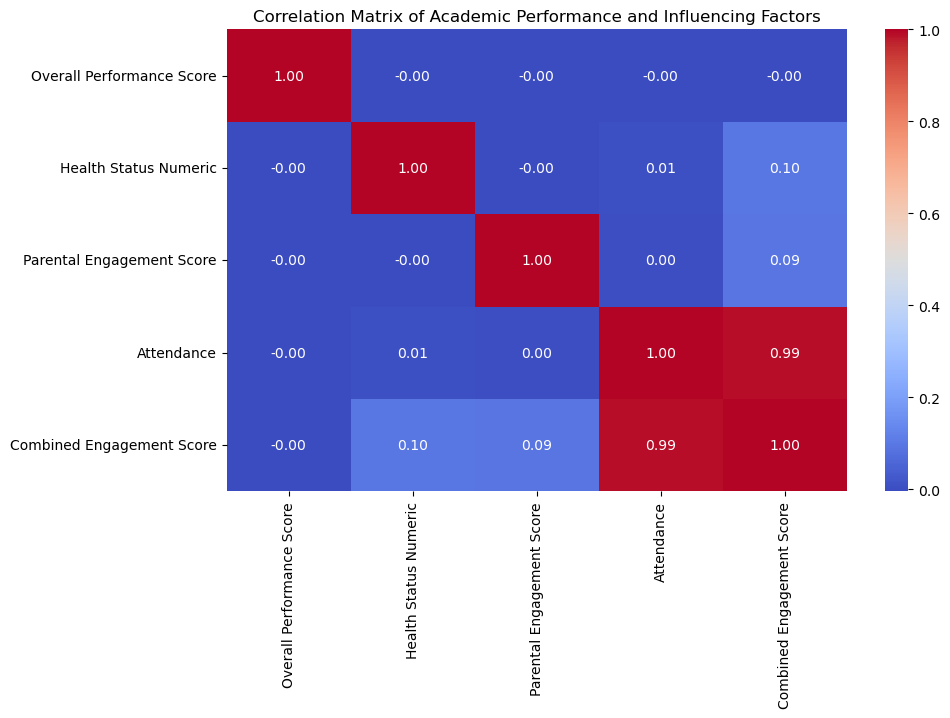

In [26]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Academic Performance and Influencing Factors')
plt.show()


# The heatmap shows the correlation between Health Status, Parental Engagement, Attendance, and Overall Performance Score.

In [27]:

# Multivariate regression analysis
import statsmodels.api as sm

# Define the independent variables and the dependent variable
X = merged_df[['Health Status Numeric', 'Parental Engagement Score', 'Attendance']]
y = merged_df['Overall Performance Score']

# Add a constant to the model (for the intercept term)
X = sm.add_constant(X)

# Build the Ordinary Least Squares (OLS) regression model
ols_model = sm.OLS(y, X).fit()

# Display the model summary
print(ols_model.summary())

                                OLS Regression Results                               
Dep. Variable:     Overall Performance Score   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.000
Method:                        Least Squares   F-statistic:                    0.8247
Date:                       Sun, 06 Oct 2024   Prob (F-statistic):              0.480
Time:                               21:42:47   Log-Likelihood:            -3.2684e+05
No. Observations:                      84198   AIC:                         6.537e+05
Df Residuals:                          84194   BIC:                         6.537e+05
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------